Segmentazione della clientela per una campagna di marketing di un'azienda di servizi finanziari
L'azienda di servizi finanziari per cui lavori sta investendo in una nuova campagna di marketing per per promuovere la propria linea di carte di credito.

Hai a disposizione un dataset contiene le seguenti informazioni su 9000 possessori di carte di credito dell'azienda:

CUST_ID : Identificazione del titolare della carta di credito (Categorico)

BALANCE : importo del saldo rimasto sul conto per effettuare acquisti

BALANCE_FREQUENCY : frequenza di aggiornamento del saldo, punteggio tra 0 e 1 (1 = aggiornato frequentemente, 0 = non aggiornato frequentemente).

PURCHASES : Quantità di acquisti effettuati dal conto

ONEOFF_PURCHASES : Importo massimo di acquisti effettuati in un'unica soluzione

INSTALLMENTS_PURCHASES : Importo degli acquisti effettuati a rate

CASH_ADVANCE : Anticipo in contanti dato dall'utente

PURCHASES_FREQUENCY : frequenza degli acquisti, punteggio tra 0 e 1 (1 = acquisti frequenti, 0 = acquisti non frequenti).

ONEOFFPURCHASESFREQUENCY : Quanto frequentemente gli acquisti vengono effettuati in un'unica soluzione (1 = acquisti frequenti, 0 = acquisti non frequenti).

PURCHASESINSTALLMENTSFREQUENCY : frequenza con cui vengono effettuati gli acquisti a rate (1 = frequentemente, 0 = non frequentemente).

CASHADVANCEFREQUENCY : frequenza con cui viene pagato l'anticipo in contanti

CASHADVANCETRX : Numero di transazioni effettuate con "contanti in anticipo".

PURCHASES_TRX : Numero di transazioni di acquisto effettuate

CREDIT_LIMIT : Limite della carta di credito dell'utente

PAYMENTS : Importo dei pagamenti effettuati dall'utente

MINIMUM_PAYMENTS : Importo minimo dei pagamenti effettuati dall'utente

PRCFULLPAYMENT : Percentuale del pagamento completo pagato dall'utente

TENURE : Durata del servizio di carta di credito per l'utente

Il tuo compito è quello di segmentare la clientela attuale indentificando dei cluster verso la quale l'azienda dovrà indirizzare apposite campagne di marketing.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

In [ ]:
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme(palette="dark")

In [ ]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"
RANDOM_SEED = 1

In [ ]:
df = pd.read_csv(DATASET_URL)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
# elimino i dati mancanti in CREDIT LIMIT

df = df.dropna(subset=['CREDIT_LIMIT'])
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
# utilizzo StandardScaler per standardizzare le variabili, ogni variabile avrà una media di 0 e una deviazione standard di 1.
scaler = StandardScaler()

In [ ]:
# Prima clusterizzazione: ["BALANCE", "CREDIT_LIMIT"]
X = df[["BALANCE", "CREDIT_LIMIT"]].values
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

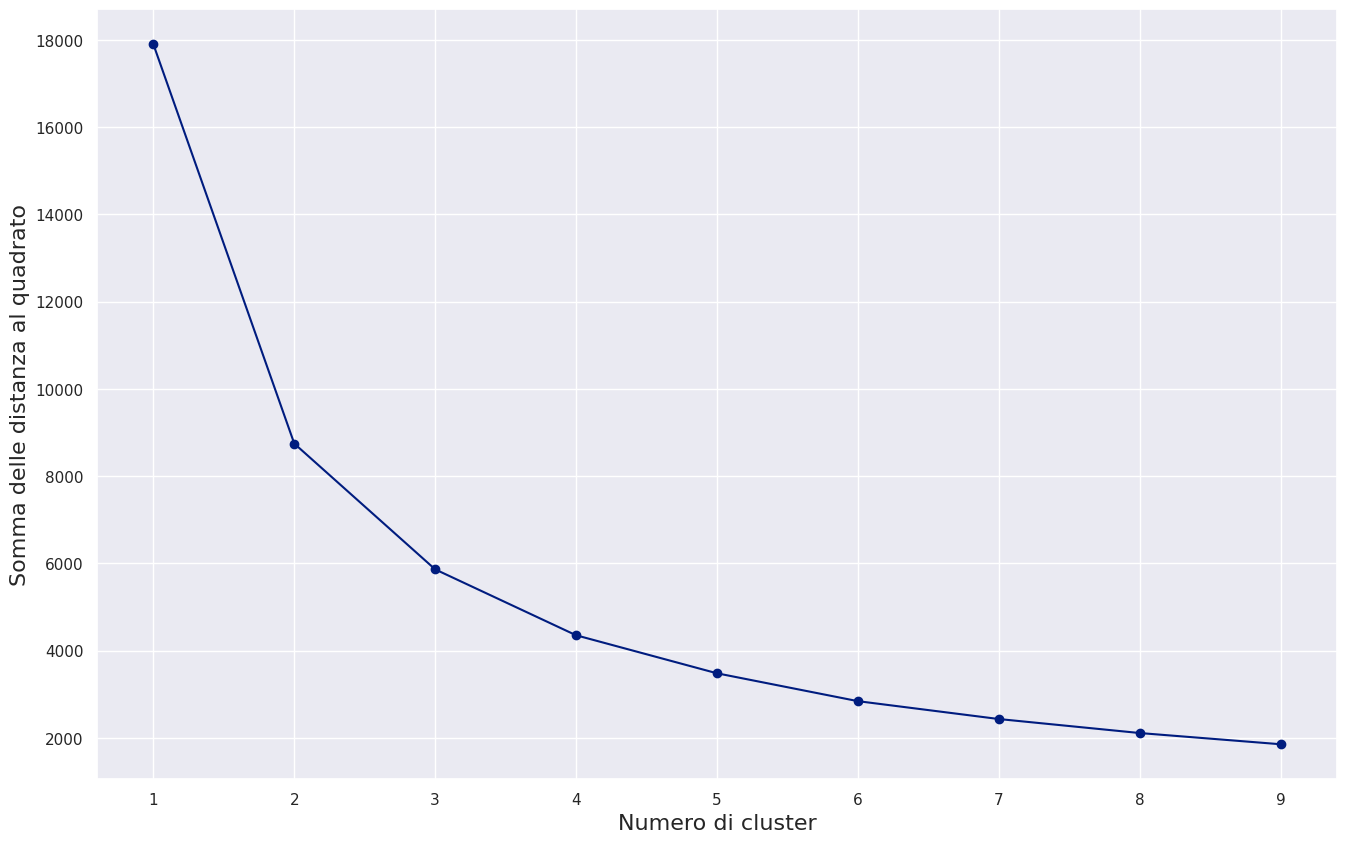

In [ ]:
def plot_ssd_curve(data):
    ssd = {}
    for k in range(1, 10):
        kmeans = KMeans(init="k-means++", n_clusters=k, random_state=RANDOM_SEED).fit(data)
        ssd[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(ssd.keys()), list(ssd.values()), marker='o')
    plt.xlabel("Numero di cluster", fontsize=16)
    plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
    plt.show()

plot_ssd_curve(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


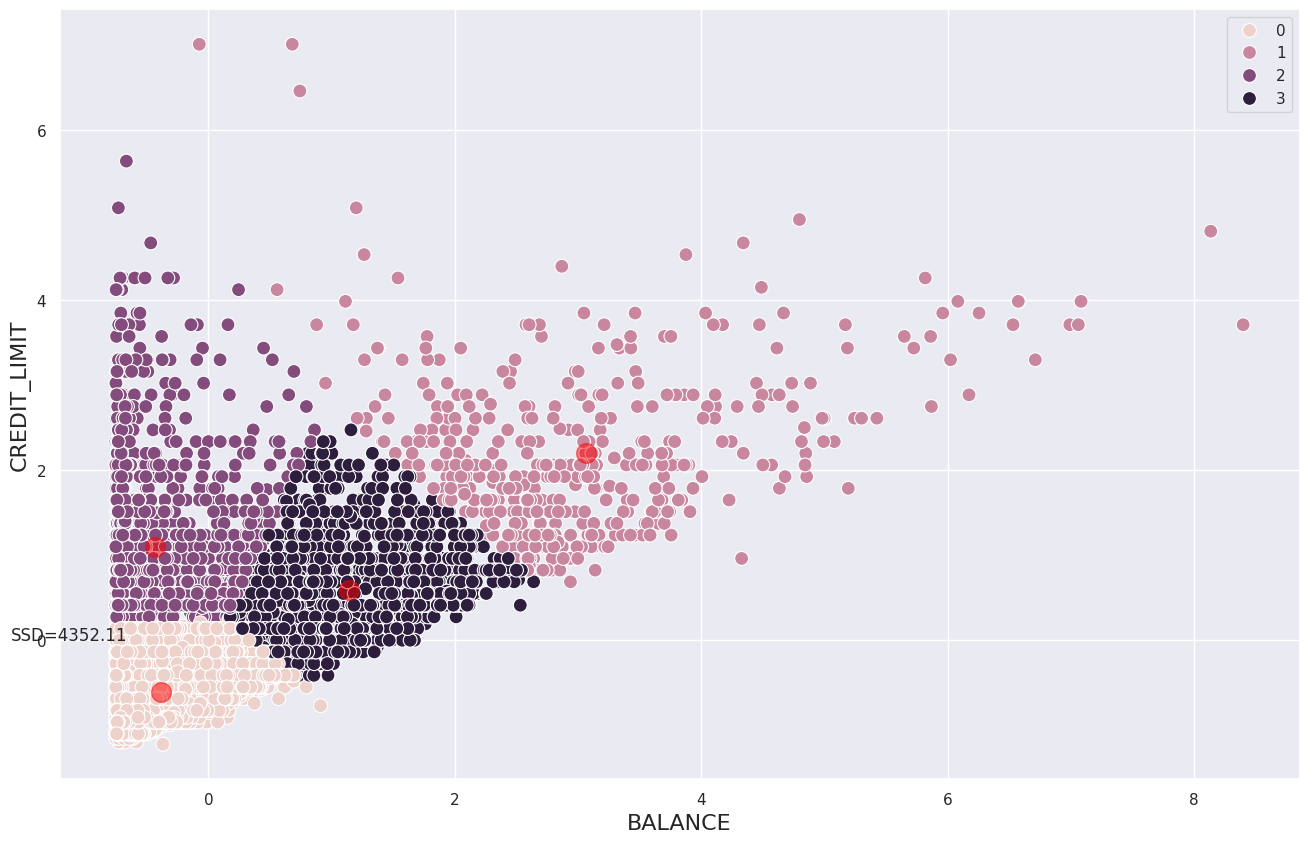

In [ ]:
def plot_clusters(model, data, axlabels=None, print_ssd=False):
    y_pred = model.predict(data)
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)

    if axlabels:
        plt.xlabel(axlabels[0], fontsize=16)
        plt.ylabel(axlabels[1], fontsize=16)

    if print_ssd:
        plt.text(data[:,0].max()-10, 0, f"SSD={model.inertia_:.2f}")

    plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=RANDOM_SEED)
kmeans.fit(X_scaled)
plot_clusters(kmeans, X_scaled, axlabels=["BALANCE", "CREDIT_LIMIT"], print_ssd=True)

La prima considerazione è stata fatta tra BALANCE e CREDIT LIMIT  per individuare quali siano i limiti di credito per i clienti e se questi abbiano necessità di aumentare il proprio plafond.

In [ ]:
# seconda clusterizzazione: ["PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY"]
X = df[["PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY"]].values
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

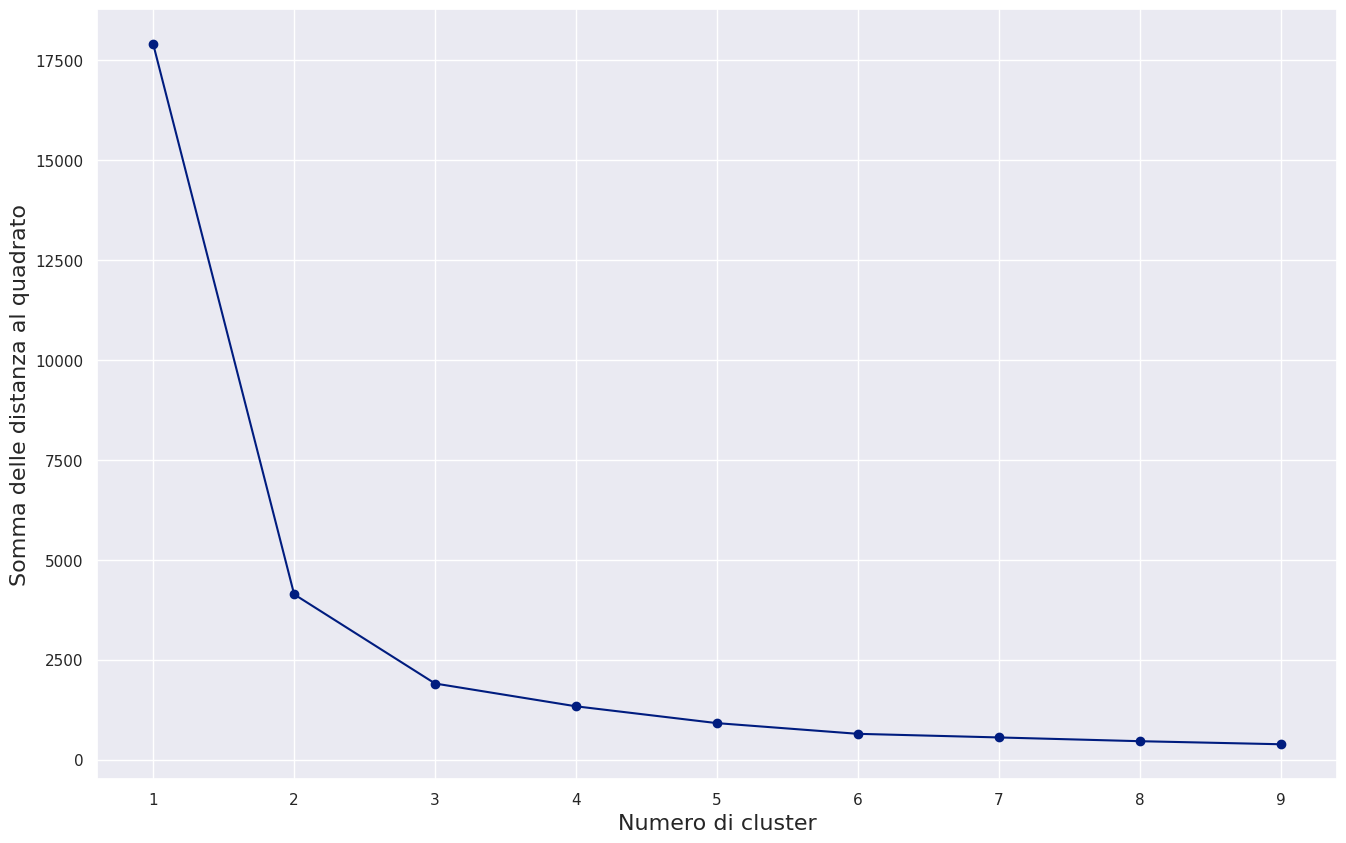

In [ ]:
plot_ssd_curve(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


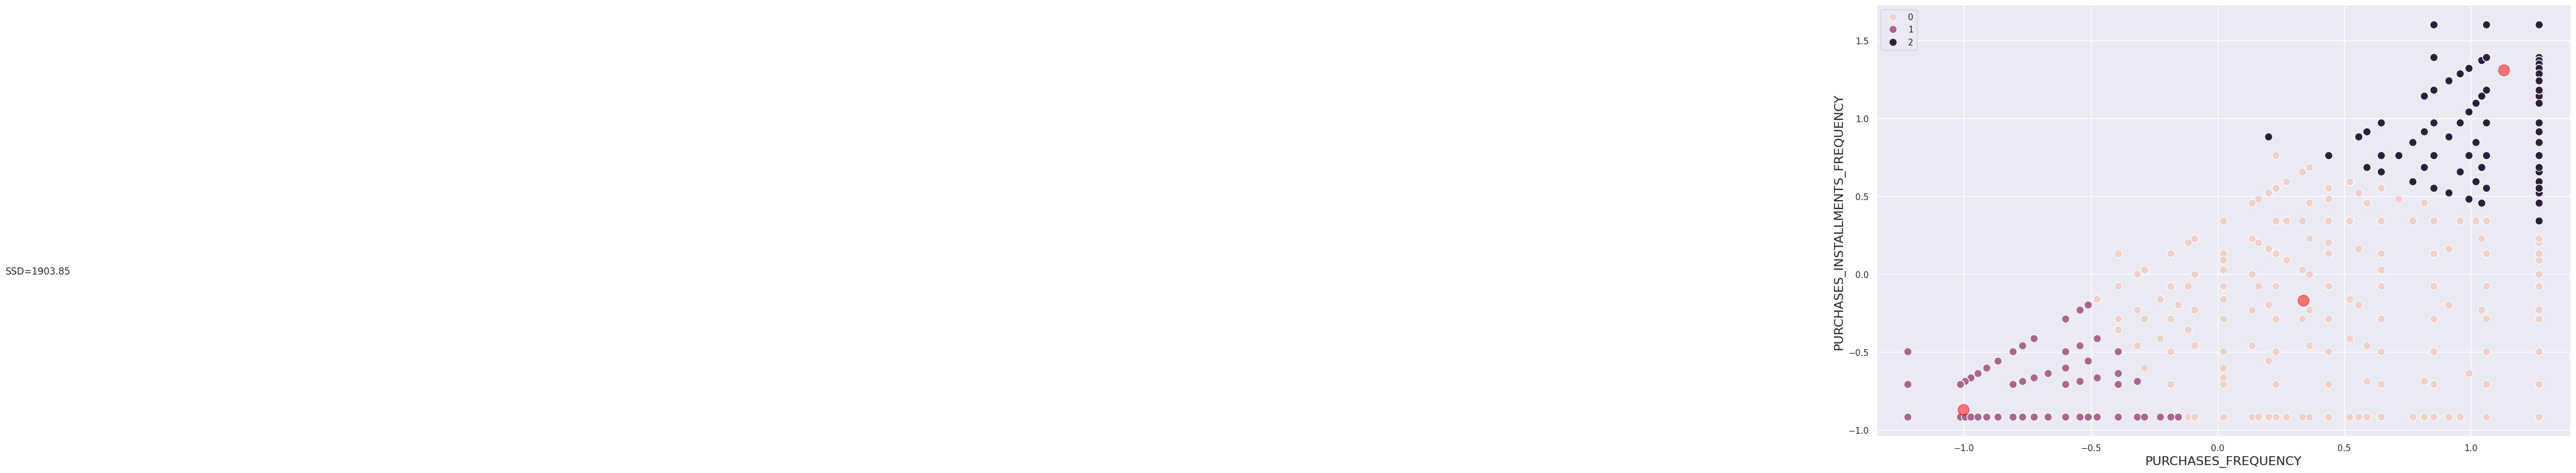

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=RANDOM_SEED)
kmeans.fit(X_scaled)
plot_clusters(kmeans, X_scaled, axlabels=["PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY"], print_ssd=True)


La seconda analisi è stata fatta sulla PURCHASES_FREQUENCY e PURCHASES_INSTALLMENTS_FREQUENCY individuando così i clienti che fanno un uso elevato degli acquisti a rate tenendo conto della frequenza degli acquisti si individuano così tre segmenti differenti

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

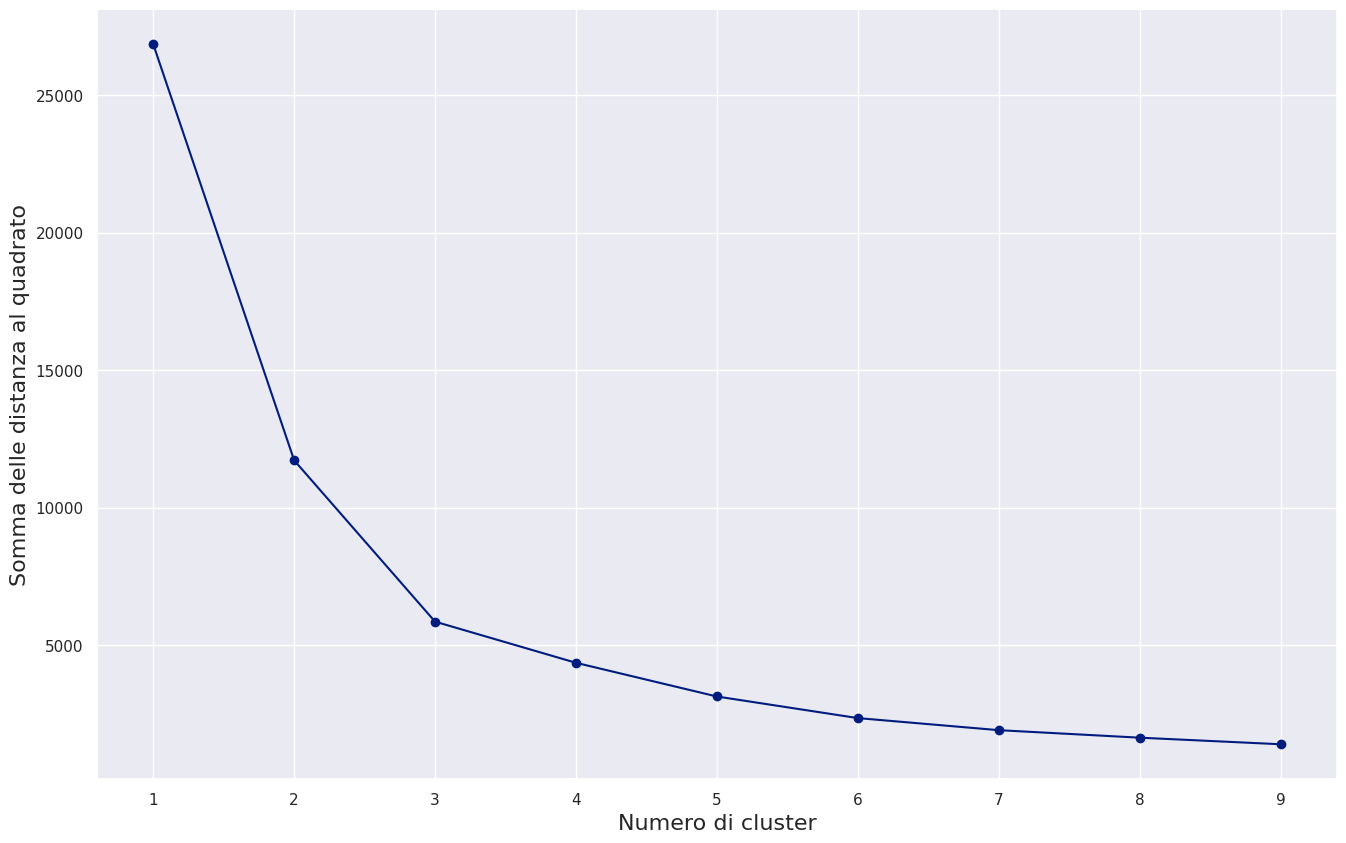

In [ ]:
# terza clusterizzazione: ["PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY"]
X = df[["PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY"]].values
X_scaled = scaler.fit_transform(X)
plot_ssd_curve(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5856.821213776435


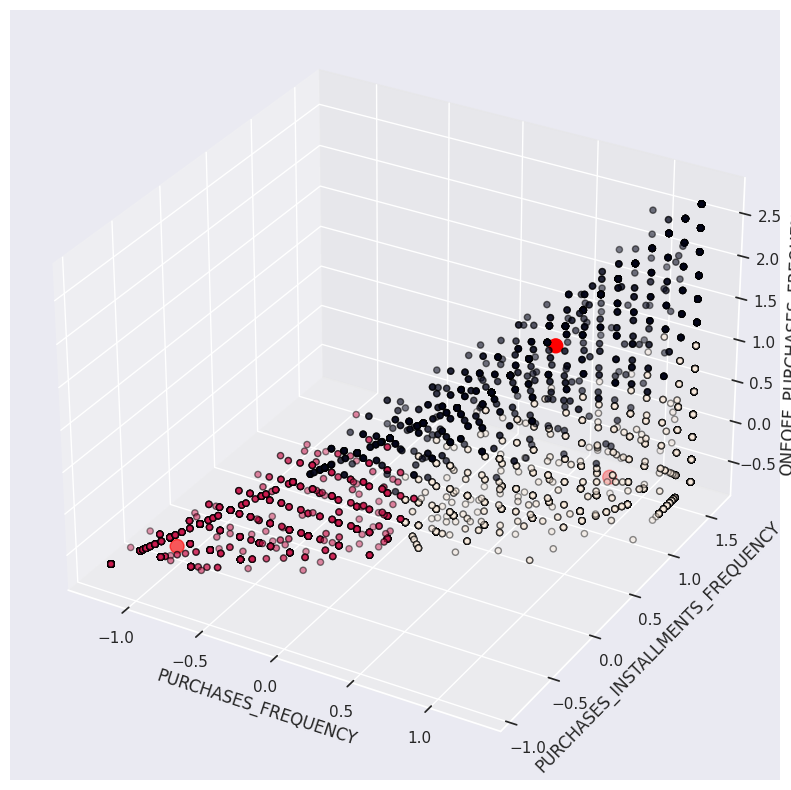

In [ ]:
def plot_clusters3d(model, data, axlabels=None):
    y_pred = model.predict(data)

    ax = plt.axes(projection="3d")
    ax.scatter3D(data[:,0], data[:,1], data[:,2], edgecolors= "black", c=y_pred)
    ax.scatter3D(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2], color="red", s=100)

    if axlabels:
        ax.set_xlabel(axlabels[0])
        ax.set_ylabel(axlabels[1])
        ax.set_zlabel(axlabels[2])

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=RANDOM_SEED)
kmeans.fit(X_scaled)
print(kmeans.inertia_)
plot_clusters3d(kmeans, X_scaled, axlabels=["PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY"])

l'ultima analisi mette a confronto PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY e ONEOFF_PURCHASES_FREQUENCY, questa ci permette di individuare i comportamenti dei cliente sia in termini di frequenza di acquisto che per quanto riguarda la modalità a rate o in unica soluzione.